In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
1)observe the saturation of layers for 10 epochs and 64 batch size:only conv layers and next dense layers as well
2)remove max pool and observe & chnage the max pool to avg pool
3)add early stop or drop out and observe
2)vary filters (increase and decrease and same) in single layer
3)vary filters in increasing and decreasing and same for sturatable layers
4)vary filter sizes
5)batch size for one layer
6)epochs for 1 layer
7)


In [ ]:
 %pip install idx2numpy  #To convert standard IDX format MNIST by "yan Lacun" into numpy array

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7920 sha256=8fb02998058d8dba5843553b170b8a356863c1aa1221c9899edc8bd2cecea60c
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
 
import pandas
from keras.models import Sequential #swquential is for plain stack of layers with each having one i/p and one o/p
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
 import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
 
X_train = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-images-idx3-ubyte')### 60k training images each with 784 pixel elements 
Y_train = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-labels-idx1-ubyte')#### labels--digits for each training image among 60k
X_test=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-images-idx3-ubyte')
Y_test=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-labels-idx1-ubyte')
 
 
print('\ntrain images:',X_train.shape)
print('train labels:',Y_train.shape)
print('test images:',X_test.shape)
print('test labels:',Y_test.shape)


train images: (112800, 28, 28)
train labels: (112800,)
test images: (18800, 28, 28)
test labels: (18800,)


In [ ]:
X_train=X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test=X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')

In [ ]:
 y_1hot=np_utils.to_categorical(Y_train)
print(y_1hot)
y_1hotTest=np_utils.to_categorical(Y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
layers=[1,2,3,4,5]
print(int(layers))

TypeError: ignored

In [ ]:
layers=[1,2,3,4,5]
Tacrcy=[];
Vacrcy=[];
e=10
for l in layers:
     model=Sequential()
     for i in range(1,int(l)):
          model.add(Conv2D(8,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
          model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    # model.add(Dropout(0.5))
     model.add(Flatten())
 
     model.add(Dense(100,activation='relu',name='i/p-layer'))
     model.add(Dense(47,activation='softmax',name='o/p-layer'))
 
     model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
     hit=model.fit(X_train,y_1hot,epochs=e,validation_split=0.33,batch_size=64,verbose=0)
     k=hit.history
     Tacrcy.append(k['accuracy'][e-1])
     Vacrcy.append(k['val_accuracy'][e-1])

In [ ]:
 def Conv_OCR_Model():
     model=Sequential()
     model.add(Conv2D(8,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    # model.add(Dropout(0.5))
     model.add(Flatten())
 
     model.add(Dense(1000,activation='relu',name='i/p-layer'))
     model.add(Dense(47,activation='softmax',name='o/p-layer'))
 
     model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
     return model

In [ ]:
model=Conv_OCR_Model()
hit=model.fit(X_train,y_1hot,epochs=2,validation_split=0.33,verbose=1)

Epoch 1/2
2362/2362 [==============================] - 75s 25ms/step - loss: 4.4244 - accuracy: 0.0222 - val_loss: 3.8500 - val_accuracy: 0.0266
Epoch 2/2
2362/2362 [==============================] - 59s 25ms/step - loss: 3.8436 - accuracy: 0.0391 - val_loss: 3.2494 - val_accuracy: 0.3381


In [ ]:
k=hit.history
print(k['accuracy'][0],k['val_accuracy'][0])


0.020853456109762192 0.020308932289481163


In [ ]:
import cv2
img=cv2.imread('/content/WhatsApp Image 2021-07-07 at 5.33.21 AM.jpeg')
imgs=cv2.resize(img,(28,28))

In [ ]:
print(imgs.shape)
i=50
k=model.predict(imgs.reshape(1,28,28,1))
p=np.argmax(k)
print('label predicted:',labels_dict[p])
print('True label:',labels_dict[Y_test[i]])

(28, 28, 3)


ValueError: ignored

In [ ]:
 #######Confusion matrix
labels_dict ={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'A',11:'B',12:'C',
              13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'l',
              22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',
              29:'T',30:'u',31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',
              38:'d',39:'e',40:'f',41:'g',42:'h',43:'n',44:'q',45:'r',46:'t'}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


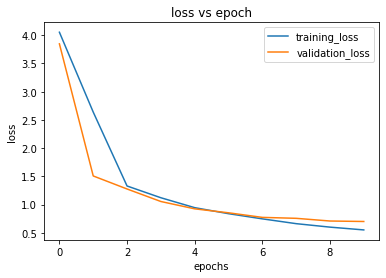

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hit.history['loss'])
plt.plot(hit.history['val_loss'])
plt.title('loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss','validation_loss'],loc='upper_right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


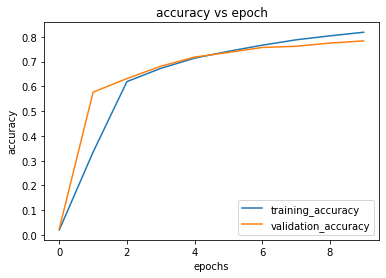

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hit.history['accuracy'])
plt.plot(hit.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_accuracy','validation_accuracy'],loc='upper_right')
plt.show()

In [ ]:
 import os
 
import tensorflow as tf
from tensorflow import keras
 
print(tf.version.VERSION)

2.5.0


In [ ]:
 !pip install pyyaml h5py

In [ ]:
 checkpoint_path = "/content/drive/MyDrive/balancedMNIST/conv"
checkpoint_dir = os.path.dirname(checkpoint_path)
 
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
 model=Conv_OCR_Model()
hist=model.fit(X_train,y_1hot,epochs=10, validation_split=0.33,batch_size=50,verbose=1,callbacks=[cp_callback])

Epoch 1/10
1512/1512 [==============================] - 51s 24ms/step - loss: 3.3211 - accuracy: 0.2201 - val_loss: 1.1699 - val_accuracy: 0.6546

Epoch 00001: saving model to /content/drive/MyDrive/balancedMNIST/conv
Epoch 2/10
1512/1512 [==============================] - 39s 26ms/step - loss: 1.3459 - accuracy: 0.6083 - val_loss: 0.8569 - val_accuracy: 0.7382

Epoch 00002: saving model to /content/drive/MyDrive/balancedMNIST/conv
Epoch 3/10
1512/1512 [==============================] - 37s 25ms/step - loss: 1.1166 - accuracy: 0.6661 - val_loss: 0.8329 - val_accuracy: 0.7370

Epoch 00003: saving model to /content/drive/MyDrive/balancedMNIST/conv
Epoch 4/10
1512/1512 [==============================] - 38s 25ms/step - loss: 1.0324 - accuracy: 0.6860 - val_loss: 0.7505 - val_accuracy: 0.7601

Epoch 00004: saving model to /content/drive/MyDrive/balancedMNIST/conv
Epoch 5/10
1512/1512 [==============================] - 37s 25ms/step - loss: 0.9547 - accuracy: 0.7067 - val_loss: 0.6853 - val

In [ ]:
 os.listdir(checkpoint_dir)

['emnist-balanced-train-images-idx3-ubyte',
 'emnist-balanced-test-images-idx3-ubyte',
 'balancedMNIST',
 'emnist-balanced-test-labels-idx1-ubyte',
 'emnist-balanced-train-labels-idx1-ubyte',
 'History_PRML.csv',
 'History_PRML.csvhistory_10_50_1_3000.csv',
 'history_10_50_1_3000.csv',
 'Acc_10_50_1_3000.png',
 'Loss_10_50_1_3000.png',
 'history_100_50_1_3000.csv',
 'Acc_100_50_1_3000.png',
 'Loss_100_50_1_3000.png',
 'conv',
 'conv20210604-111633',
 'conv.index',
 'conv.data-00000-of-00001',
 'checkpoint']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


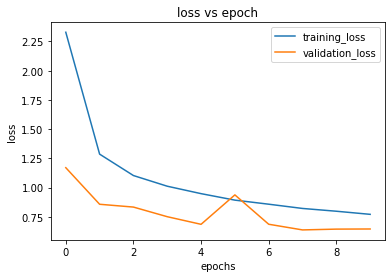

In [ ]:
 import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss','validation_loss'],loc='upper_right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


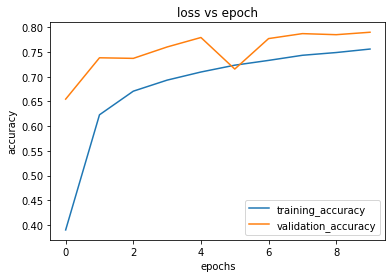

In [ ]:
 import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_accuracy','validation_accuracy'],loc='upper_right')
plt.show()

In [ ]:
 model.evaluate(X_test,y_1hotTest,verbose=1)

588/588 [==============================] - 3s 6ms/step - loss: 0.6671 - accuracy: 0.7886


[0.6670942306518555, 0.7885638475418091]

In [ ]:
 pred=model.predict_classes(X_test[4].reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
i/p-layer (Dense)            (None, 32)                173088    
_________________________________________________________________
o/p-layer (Dense)            (None, 47)                1551      
Total params: 174,959
Trainable params: 174,959
Non-trainable params: 0
__________________________________________________

In [ ]:
 #######Confusion matrix
labels_dict ={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'A',11:'B',12:'C',
              13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'l',
              22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',
              29:'T',30:'u',31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',
              38:'d',39:'e',40:'f',41:'g',42:'h',43:'n',44:'q',45:'r',46:'t'}

In [ ]:
 List=labels_dict.values()
class_names=list(List)
print(class_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'l', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'u', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


In [ ]:
 import io
import itertools
import numpy as np
import sklearn.metrics
import tensorflow as tf
import matplotlib.pyplot as plt
 
from tensorflow import keras
from datetime import datetime
 
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
 from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
 y_predicts=model.predict(X_test)

In [ ]:
 cm=confusion_matrix(y_1hotTest.argmax(axis=1),y_predicts.argmax(axis=1))
print(cm.shape)

(47, 47)


[[  0   0   0 ...   0   0   0]
 [  0  90   2 ...   3   3   0]
 [  0   0 328 ...   3   0   0]
 ...
 [  0   0   4 ... 301   0   0]
 [  0   0   0 ...   0 355   4]
 [  0   0   0 ...   0  10 342]]


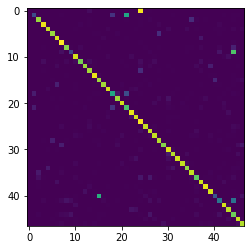

In [ ]:
 print(cm)
plt.imshow(cm)

Text(0.5, 109.94625272391737, 'Predicted label')

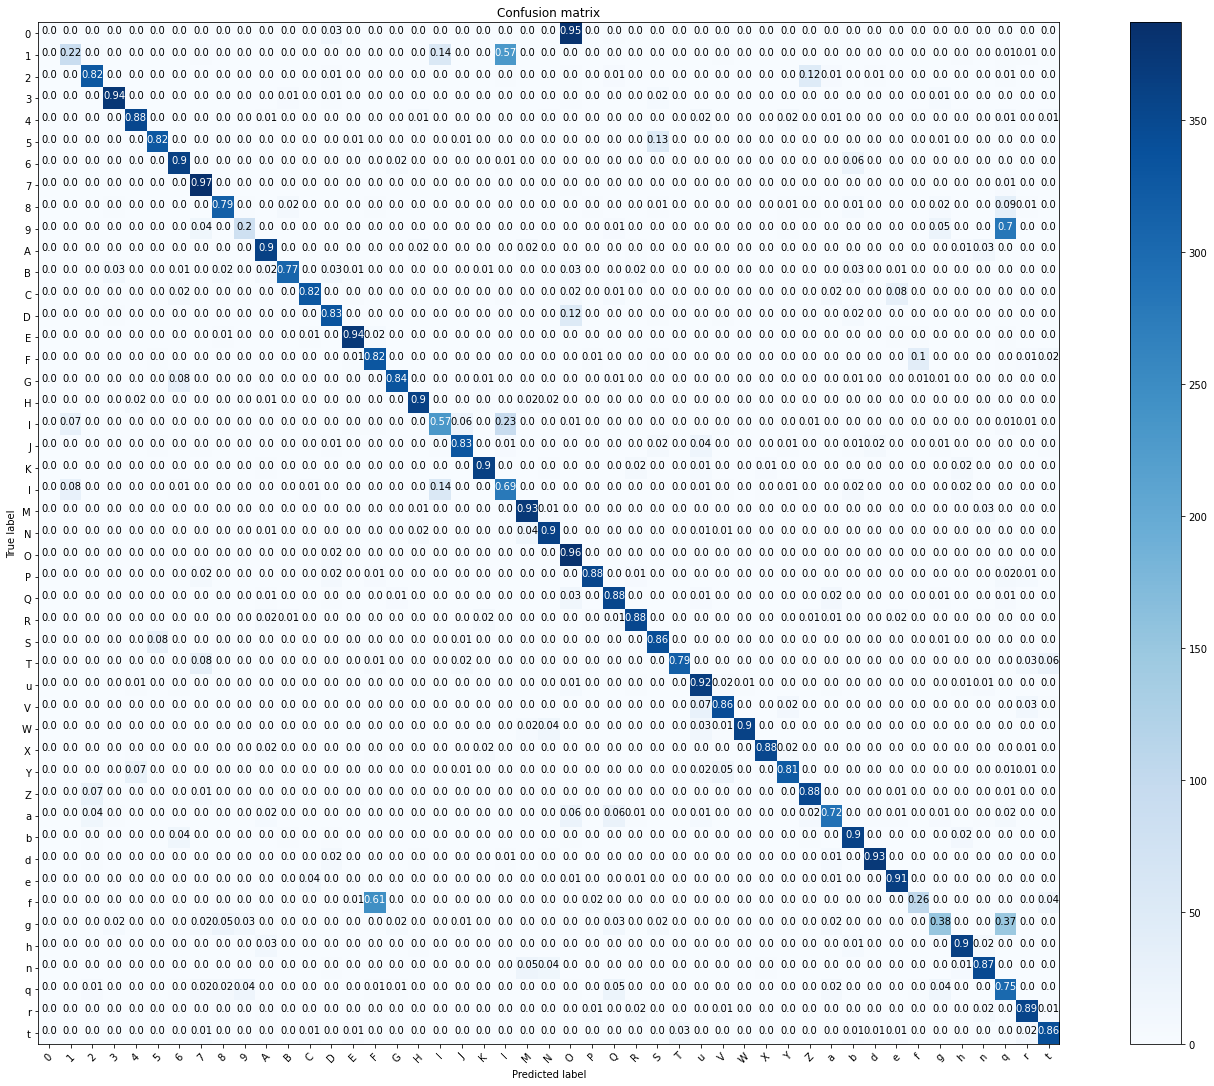

In [ ]:
    figure = plt.figure(figsize=(20, 15))
    plt.imshow(cm,cmap=plt.cm.Blues)#     interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
     # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
 print( np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2))

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.23 0.   ... 0.01 0.01 0.  ]
 [0.   0.   0.83 ... 0.01 0.   0.  ]
 ...
 [0.   0.   0.01 ... 0.77 0.   0.  ]
 [0.   0.   0.   ... 0.   0.93 0.01]
 [0.   0.   0.   ... 0.   0.02 0.89]]
